# **Total Appearance of SQL Keywords in Dataset**

In [ ]:
# ------------------ COLAB SETUP ------------------
from google.colab import files
import zipfile
import os

# Step 1: Upload your ZIP file
uploaded = files.upload()  # choose your zip file

zip_path = list(uploaded.keys())[0]
print("Uploaded:", zip_path)

# Step 2: Unzip
unzip_dir = "/content"
os.makedirs(unzip_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

# List files in unzipped folder
import glob
print("Files in unzipped folder:", glob.glob(unzip_dir + "/*"))

# Assume the CSV is named sqli_updated.csv inside the ZIP
csv_path = glob.glob(unzip_dir + "/*.csv")[0]
print("Using CSV file:", csv_path)



Saving rbsqli.zip to rbsqli.zip
Uploaded: rbsqli.zip
Files in unzipped folder: ['/content/sql_injectiondataset_final_updated.csv', '/content/rbsqli.zip', '/content/sample_data']
Using CSV file: /content/sql_injectiondataset_final_updated.csv


In [ ]:
# Step 1: Import libraries
import pandas as pd
import re

# ---------------- CONFIG ----------------
dataset_path = "/content/sql_injectiondataset_final_updated.csv"

# Load dataset
df = pd.read_csv(dataset_path, low_memory=False)
df = df[['sql_query','injection_type','vulnerability_status']]

# Define SQL keywords (include special case)
sql_keywords = ["EXEC\\('SELECT", "SELECT", "UPDATE", "DELETE", "EXEC", "CALL", "INSERT"]

# Initialize a dictionary to store total counts
total_counts = {kw.replace("\\(", "("): 0 for kw in sql_keywords}

# Count keywords across all rows
for query in df['sql_query']:
    for kw in sql_keywords:
        matches = re.findall(kw, str(query), flags=re.IGNORECASE)
        total_counts[kw.replace("\\(", "(")] += len(matches)

# Convert to a table (DataFrame)
keyword_summary = pd.DataFrame(list(total_counts.items()), columns=['Keyword', 'Total_Count'])
print(keyword_summary)


        Keyword  Total_Count
0  EXEC('SELECT       445040
1        SELECT      4173420
2        UPDATE      4377250
3        DELETE      1463760
4          EXEC      1693520
5          CALL      1278300
6        INSERT      1278780


/tmp/ipython-input-4167019535.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Keyword', y='Total_Count', data=keyword_summary_sorted, palette='viridis')


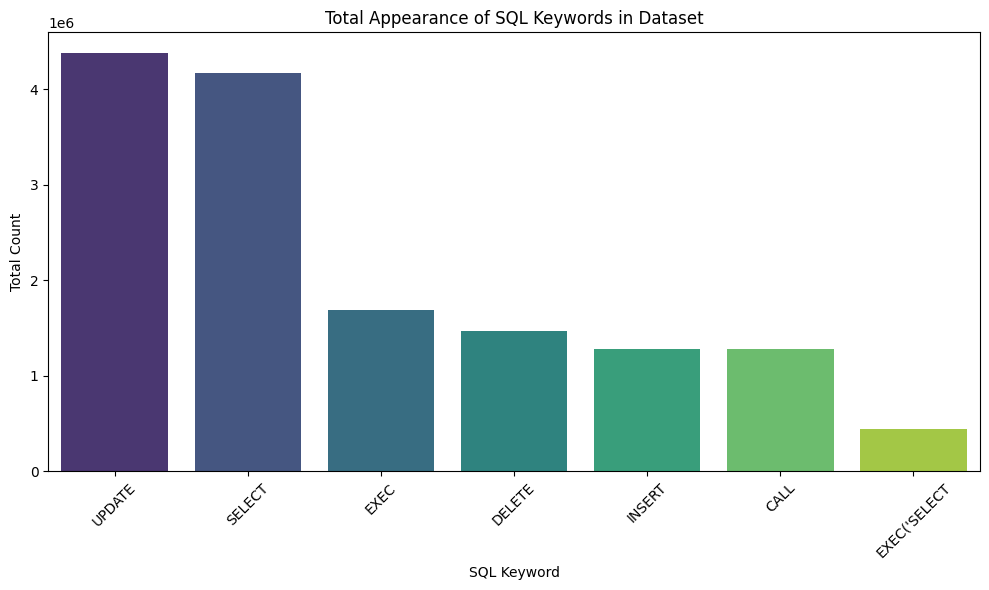

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort keywords by total count (descending)
keyword_summary_sorted = keyword_summary.sort_values(by='Total_Count', ascending=False)

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x='Keyword', y='Total_Count', data=keyword_summary_sorted, palette='viridis')

plt.title('Total Appearance of SQL Keywords in Dataset')
plt.ylabel('Total Count')
plt.xlabel('SQL Keyword')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()